# Key Concepts 

#### GHI (Global Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar total recibida por la superficie horizontal de la Tierra, incluyendo la radiación directa del sol, la radiación difusa (reflejada por la atmósfera) y la radiación del cielo nublado.
#### DNI (Direct Normal Irradiance) [W/m2]: 
Es la cantidad de radiación solar directa recibida por un panel solar colocado perpendicularmente al sol. No incluye la radiación difusa ni la radiación reflejada.
#### DHI (Diffuse Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar difusa que llega a la superficie de la Tierra proveniente de todas las direcciones del cielo, excepto la radiación directa del sol.

## GHI=DNI⋅cos(ángulo Solar)+DHI

## Potencia Generada por un sistema fotovoltaico
Potencia (W)=Radiación Solar (W/m 2 )×Eficiencia del Panel Solar× Area del Panel Solar (m 2 )

<img src="../../Visualizations/img/areas.png" width="50%">

## Import Libraries

In [210]:
import numpy as np            # manejo arreglos
import pandas as pd           # manipulación dataframes      
import matplotlib.pyplot as plt    # Realiza graficas
import pytz                        # manipulación de zonas horarias                     
from datetime import datetime, date, timedelta  # manipulacion de fechas y horas

## Def Solar Power 

In [211]:
# Metodo que calcule la potencia a partirt del valor de GHI relacioando: Potencia (W)=Radiación Solar (W/m 2 )×Eficiencia del Panel Solar× Area del Panel Solar (m 2 )
def potencia(ghi, eficiencia, area):
    return ghi * eficiencia * area

# Metodo que calcule la energía a partir de la potencia y el tiempo en horas
def energia(potencia, tiempo):
    return potencia * tiempo


## Import CSV Fronius 01-01-2023


In [219]:
# leer el archivo csv en la ruta Data/Processed/SFV_01-01-2023.csv
df = pd.read_csv('../../Data/Processed/SFV_01-01-2023.csv')

# nuevo dataframe con las columnas de hora y producción fotovoltaica
df_SFV = df[['Hora', 'Producción fotovoltaica']]


# # Buscar el valor '11:40' en la columna 'Hora'
# selected_rows = df_SFV.loc[df_SFV['Hora'] == '06:45']
# print(selected_rows)



     Corriente CA L1 | FRONIUS Symo 15.0-3 208 (1)  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
..                                             ...   
283                                            0.0   
284                                            0.0   
285                                            0.0   
286                                            0.0   
287                                            0.0   

     Corriente CA L2 | FRONIUS Symo 15.0-3 208 (1)  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
..                         

## Potencia [W]

In [224]:
import numpy as np

# calcula potencia dividiendo la producción fotovoltaica entre 5 minutos
df_SFV['Potencia'] = df_SFV['Producción fotovoltaica'] / (5/60)
print(df_SFV)




      Hora  Producción fotovoltaica  Potencia
0    00:00                      0.0       0.0
1    00:05                      0.0       0.0
2    00:10                      0.0       0.0
3    00:15                      0.0       0.0
4    00:20                      0.0       0.0
..     ...                      ...       ...
283  23:35                      0.0       0.0
284  23:40                      0.0       0.0
285  23:45                      0.0       0.0
286  23:50                      0.0       0.0
287  23:55                      0.0       0.0

[288 rows x 3 columns]


/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_75755/4195564100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SFV['Potencia'] = df_SFV['Producción fotovoltaica'] / (5/60)


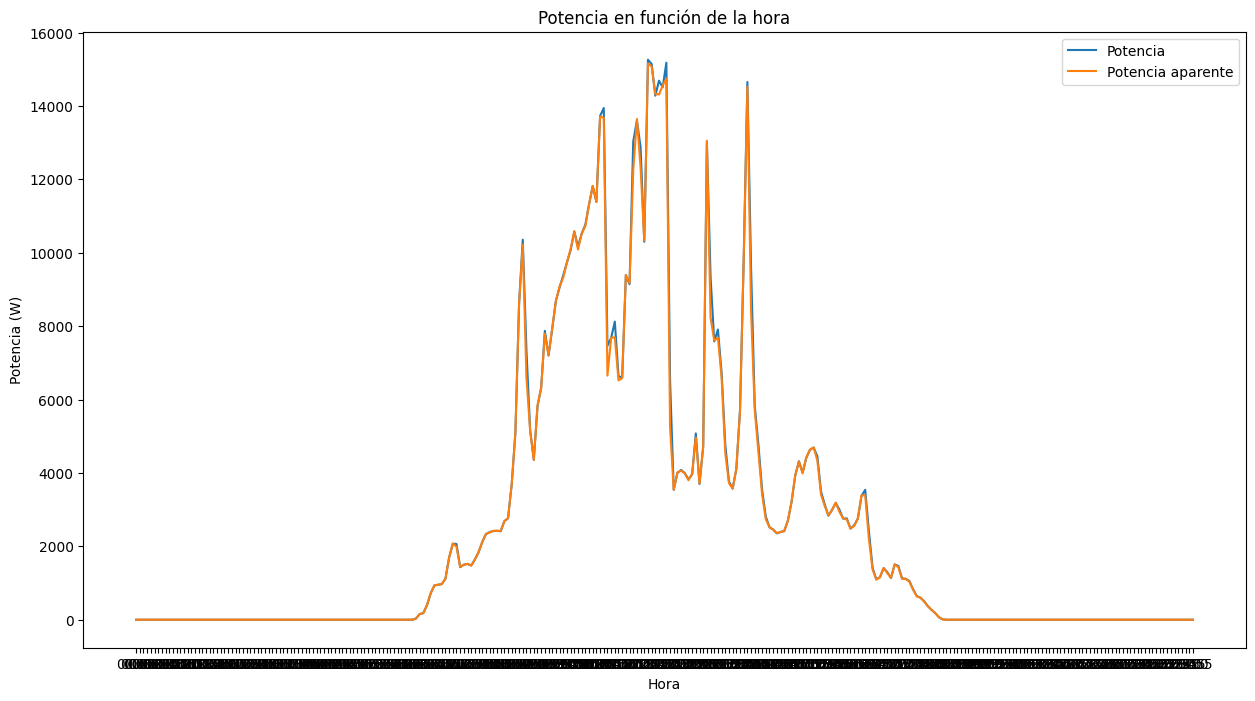

In [226]:
# # Graficar la potencia en función de la hora
plt.figure(figsize=(15,8))
plt.plot(df_SFV['Hora'], df_SFV['Potencia'], label='Potencia')
plt.plot(df['Hora'] ,df['Potencia aparente | FRONIUS Symo 15.0-3 208 (1)'], label='Potencia aparente')
plt.xlabel('Hora')
plt.ylabel('Potencia (W)')
plt.title('Potencia en función de la hora')
plt.legend()
plt.show()


## Grafico producción fotovoltaica Fronius

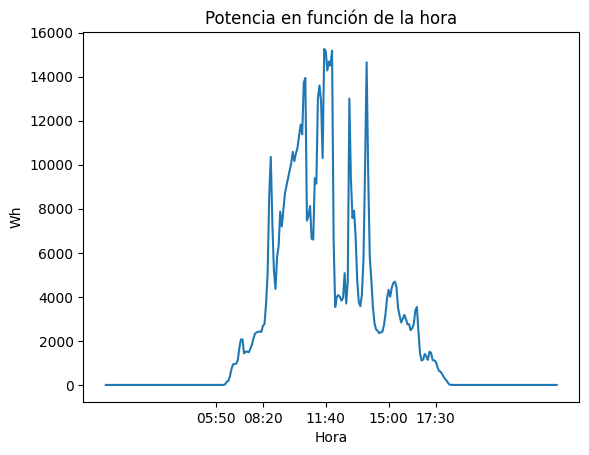

In [227]:
# Graficar la producción fotovoltaica en función de la hora
plt.plot(df_SFV['Hora'], df_SFV['Potencia'])
plt.xlabel('Hora')
plt.ylabel('Wh')
plt.title('Potencia en función de la hora')
plt.xticks([70,100,140,180,210])  
plt.show()


## Irradiancia calculada 

In [232]:
eficiencia = 0.2094
catidad_pv= 30
area =2.274*1.134

potencia_pv= df_SFV['Potencia']

Irr=potencia_pv/(eficiencia*area*catidad_pv)
# print(Irr)
# agregar Irrr en df_SFV
df_SFV['Irr'] = Irr
print(df_SFV)

      Hora  Producción fotovoltaica  Potencia  Irr
0    00:00                      0.0       0.0  0.0
1    00:05                      0.0       0.0  0.0
2    00:10                      0.0       0.0  0.0
3    00:15                      0.0       0.0  0.0
4    00:20                      0.0       0.0  0.0
..     ...                      ...       ...  ...
283  23:35                      0.0       0.0  0.0
284  23:40                      0.0       0.0  0.0
285  23:45                      0.0       0.0  0.0
286  23:50                      0.0       0.0  0.0
287  23:55                      0.0       0.0  0.0

[288 rows x 4 columns]


/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_75755/219400591.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SFV['Irr'] = Irr


## Graph Irr

Irradicancia calculada a partir de la producción del pv

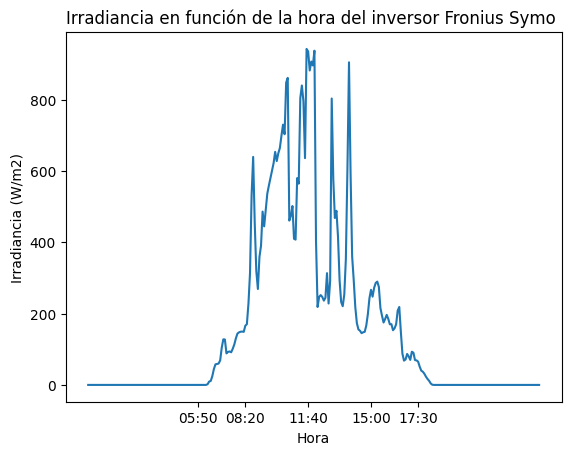

In [236]:
# Graficar la Irradiación en función de la hora
plt.plot(df_SFV['Hora'], df_SFV['Irr'])
plt.xlabel('Hora')
plt.ylabel('Irradiancia (W/m2)')
plt.title('Irradiancia en función de la hora del inversor Fronius Symo ')
plt.xticks([70,100,140,180,210])
plt.show()


## Import CSV SolarGIS 01-01-2023

In [237]:
# Importar archivo csv solargis_01-01-2023.csv
df_solargis = pd.read_csv('../../Data/Processed/solargis_01-01-2023.csv')
# Crear un nuevo dataframe con las columnas de hora y GHI
df_GHI = df_solargis[['Time', 'GHI']]
# print(df_GHI)
# Eliminar el primer carácter de 'Time'
df_GHI['Time'] = df_GHI['Time'].str.slice(1)

print(df_GHI)

      Time  GHI
0    19:05    0
1    19:15    0
2    19:25    0
3    19:35    0
4    19:45    0
..     ...  ...
139  18:15    0
140  18:25    0
141  18:35    0
142  18:45    0
143  18:55    0

[144 rows x 2 columns]


/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_75755/670414002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GHI['Time'] = df_GHI['Time'].str.slice(1)


## Grafico GHI SolarGIS DB

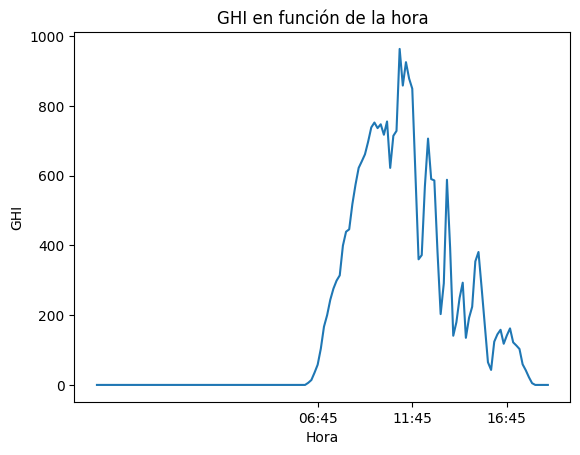

In [238]:
# Graficar la GHI en función de la hora
plt.plot(df_GHI['Time'], df_GHI['GHI'])
plt.xlabel('Hora')
plt.ylabel('GHI')
plt.title('GHI en función de la hora')
plt.xticks([70,100,130])
plt.show()

## Time matching between DB

In [239]:
# Crear un nuevo DataFrame vacío
new_df = pd.DataFrame()

# Iterar sobre cada valor en 'Time'
for time in df_GHI['Time']:
    # Buscar el valor en 'Hora' y guardar las filas correspondientes en el nuevo DataFrame
    matching_rows = df_SFV[df_SFV['Hora'] == time]
    new_df = pd.concat([new_df, matching_rows])

print(new_df)

      Hora  Producción fotovoltaica  Potencia       Irr
229  19:05                     0.00      0.00  0.000000
231  19:15                     0.00      0.00  0.000000
233  19:25                     0.00      0.00  0.000000
235  19:35                     0.00      0.00  0.000000
237  19:45                     0.00      0.00  0.000000
..     ...                      ...       ...       ...
219  18:15                     0.77      9.24  0.570388
221  18:25                     0.00      0.00  0.000000
223  18:35                     0.00      0.00  0.000000
225  18:45                     0.00      0.00  0.000000
227  18:55                     0.00      0.00  0.000000

[144 rows x 4 columns]


## Graph Matching Between DB

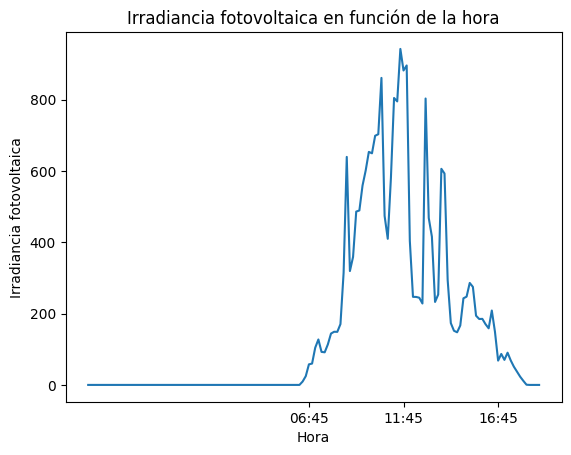

In [241]:
#Grafica new_df 

plt.plot(new_df['Hora'], new_df['Irr'])
plt.xlabel('Hora')
plt.ylabel('Irradiancia fotovoltaica')
plt.title('Irradiancia fotovoltaica en función de la hora')
plt.xticks([70,100,130])
plt.show()





## Graficas sobrepuestas 

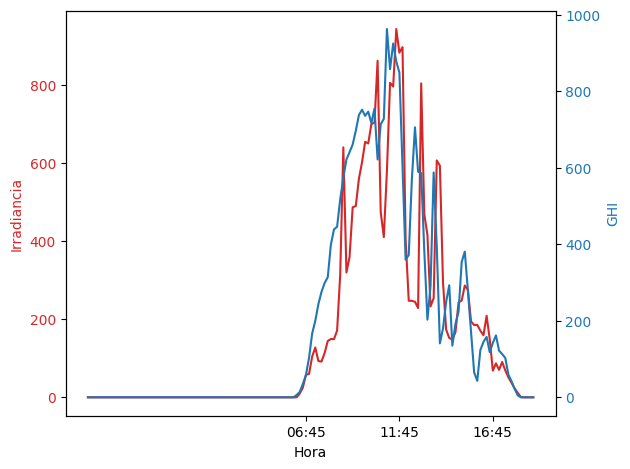

In [242]:
# en una sola grafica new_df y df_GHI
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Hora')
ax1.set_ylabel('Irradiancia', color=color)
ax1.plot(new_df['Hora'], new_df['Irr'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('GHI', color=color)  # we already handled the x-label with ax1
ax2.plot(df_GHI['Time'], df_GHI['GHI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks([70,100,130])
plt.show()


## Read CSV Irradiancia_SFV_01-01-2023

In [ ]:
# Leer el archivo csv 'Irradiancia_SFV_01-01-2023.csv'
df_irradiancia = pd.read_csv('../../Data/Processed/Irradiancia_SFV_01-01-2023.csv')
print(df_irradiancia)
# Crear un nuevo dataframe con las columnas de hora y producción fotovoltaica
# df_SFV = df_irradiancia[['Hora', 'Producción fotovoltaica']]
# print(df_SFV)


## Graph Irradiancia_SFV_01-01-2023 

In [ ]:
# graficar df_irradiancia con relación a la Hora
plt.plot(df_irradiancia['Hora'], df_irradiancia['Irradiancia'])
plt.xlabel('Hora')
plt.ylabel('Irradiancia')
plt.title('Irradiancia en función de la hora')
plt.xticks([70,100,140,180,210]) 
plt.show()


## General Graph

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df_irradiancia['Hora'], df_irradiancia['Irradiancia'], label='Irradiancia Fronius')
plt.plot(new_df['Hora'], new_df['Producción fotovoltaica'], label='Producción fotovoltaica Fronius')
plt.plot(df_GHI['Time'], df_GHI['GHI'], label='GHI')
plt.xlabel('Hora')
# plt.ylabel('Irradiancia')
plt.title('Comparación')
plt.xticks([70,100,140,180,210]) 
plt.legend()
plt.show()

## Time matching between DB solarGIS & Irradiance

In [ ]:
# Crear un nuevo DataFrame vacío
new_df_irradiancia = pd.DataFrame()

# Iterar sobre cada valor en 'Time'
for time in df_GHI['Time']:
    # Buscar el valor en 'Hora' y guardar las filas correspondientes en el nuevo DataFrame
    matching_rows = df_irradiancia[df_irradiancia['Hora'] == time]
    new_df_irradiancia = pd.concat([new_df_irradiancia, matching_rows])

print(new_df_irradiancia)

## Graph Irradiance & GHI

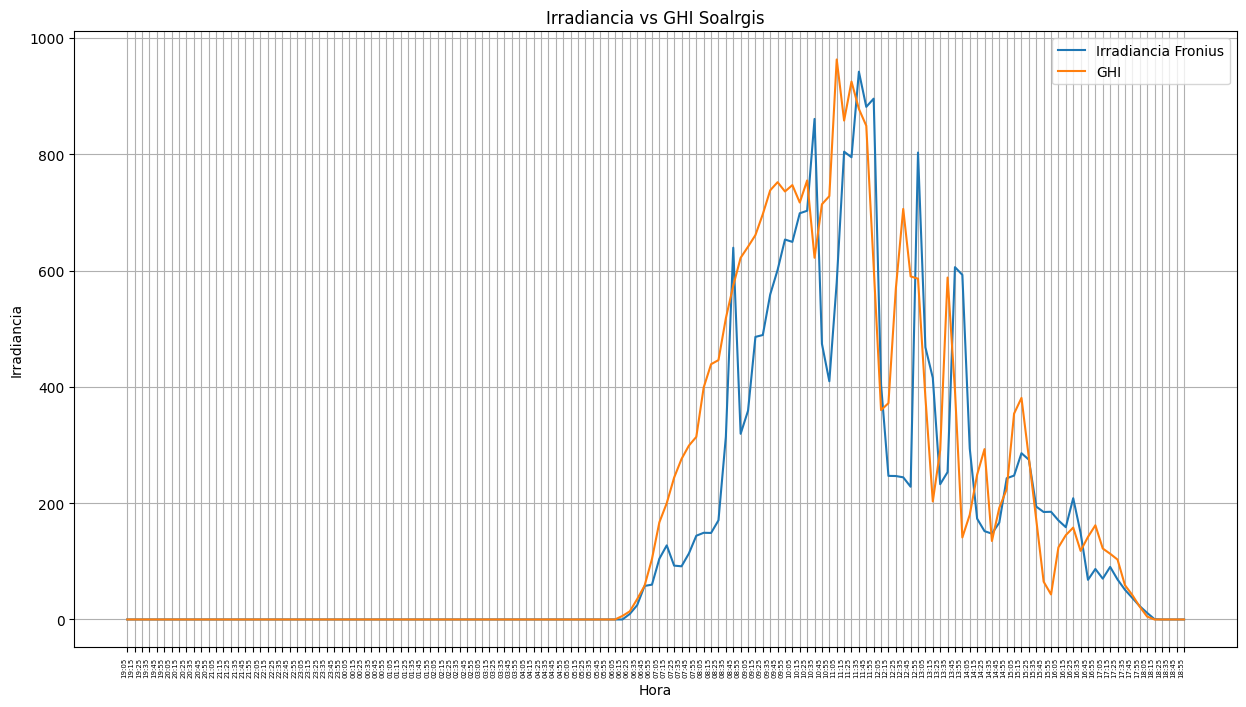

In [243]:
# frafica new_df_irradiancia
plt.figure(figsize=(15,8))

plt.plot(new_df['Hora'], new_df['Irr'], label='Irradiancia Fronius')
#incluir GHI
plt.plot(df_GHI['Time'], df_GHI['GHI'], label='GHI')


#grafico stem   
# plt.stem(new_df_irradiancia['Hora'], new_df_irradiancia['Irradiancia'], label='Irradiancia Fronius')
# plt.stem(df_GHI['Time'], df_GHI['GHI'], label='GHI')


plt.xlabel('Hora')
plt.ylabel('Irradiancia')
plt.title('Irradiancia vs GHI Soalrgis')
#incluir cuadricula
plt.legend()
plt.grid()
# plt.xticks([70,100,130])
#x_ticks vertical
plt.xticks(rotation=90, ha='right', size=5)
plt.show()


## Without zeros

In [245]:
# new_df_irradiancia sin ceros en la columna Irradiancia

new_df_irradiancia = new_df[new_df['Irr'] != 0]
# print(new_df_irradiancia)
print(new_df_irradiancia.shape)

#df_GHI sin ceros en la columna GHI
df_GHI = df_GHI[df_GHI['GHI'] != 0]
# print(df_GHI)
print(df_GHI.shape)




(73, 4)
(72, 2)


## Graph witout zero

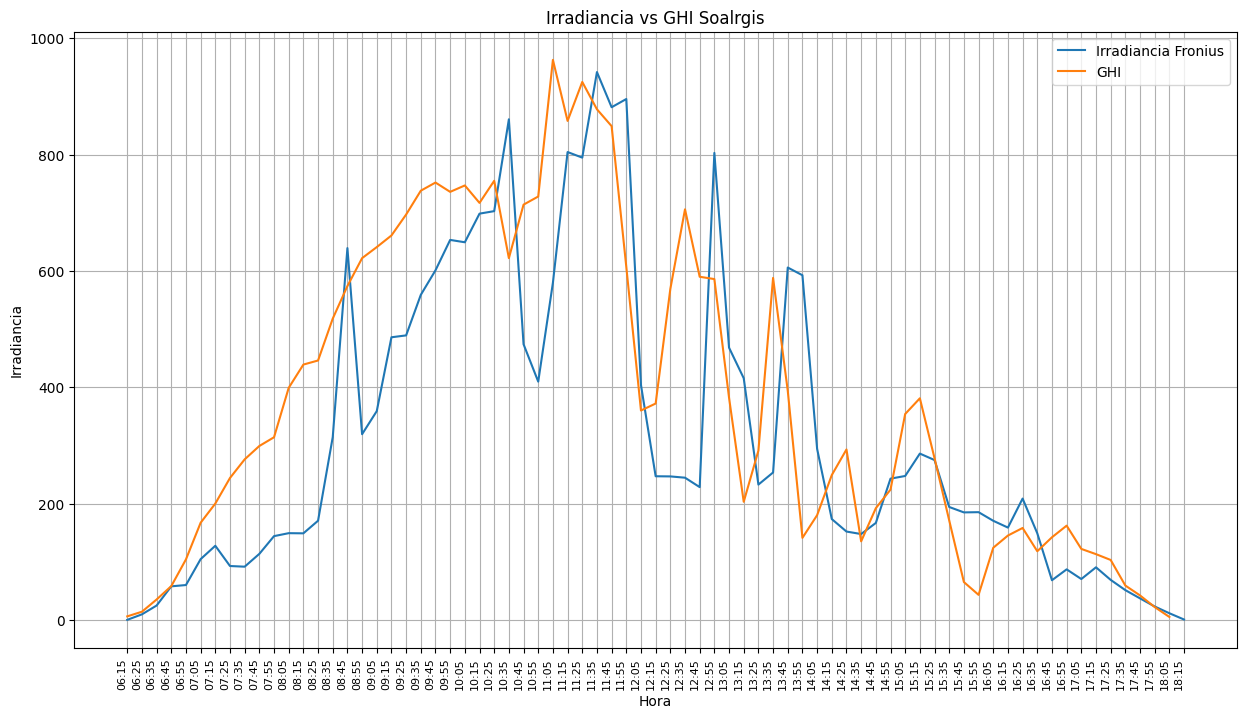

In [247]:
# graficar new_df_irradiancia con relación a la Hora
plt.figure(figsize=(15,8))
plt.plot(new_df_irradiancia['Hora'], new_df_irradiancia['Irr'], label='Irradiancia Fronius')
plt.plot(df_GHI['Time'], df_GHI['GHI'], label='GHI')
plt.xlabel('Hora')
plt.ylabel('Irradiancia')
plt.title('Irradiancia vs GHI Soalrgis')
#incluir cuadricula
plt.legend()
plt.grid()
# plt.xticks([70,100,130])
#x_ticks vertical
plt.xticks(rotation=90, ha='right', size=8)
plt.show()